In [2]:
import torch
import torch.nn as nn
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [4]:
X = np.load('X.npy')
normalize_c = np.load('normalize_constant.npy')
train_losses = np.load('train_losses.npy')
val_losses = np.load('val_losses.npy')

In [36]:
train_losses_promax = np.load('train_losses_promax.npy')
val_losses_promax = np.load('val_losses_promax.npy')

In [5]:
normalize_c

array(567.64196324)

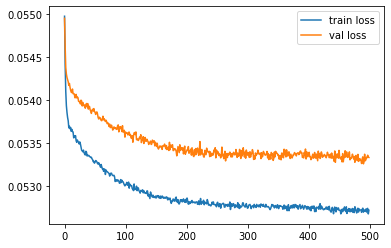

In [7]:
plt.plot(range(train_losses.shape[0]), train_losses)
plt.plot(range(train_losses.shape[0]), val_losses)
plt.legend(['train loss', 'val loss'], loc="upper right")
plt.show()

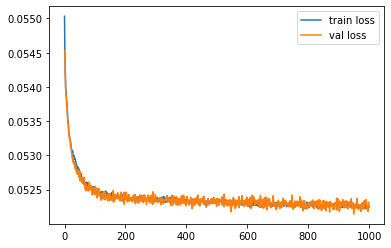

In [37]:
plt.plot(range(train_losses_promax.shape[0]), train_losses_promax)
plt.plot(range(train_losses_promax.shape[0]), val_losses_promax)
plt.legend(['train loss', 'val loss'], loc="upper right")
plt.show()

In [8]:
class MLP(nn.Module):
    def __init__(self, N, p):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(N, 1024)
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, 2048)
        self.fc4 = nn.Linear(2048, 1024)
        self.fc5 = nn.Linear(1024, p)
        self.relu = nn.ReLU()
        self.mseloss = nn.MSELoss()
        self.bceloss = nn.BCEWithLogitsLoss()

    def forward(self, input):
        u = self.relu(self.fc1(input))
        u = self.relu(self.fc2(u))
        u = self.relu(self.fc3(u))
        u = self.relu(self.fc4(u))
        output = self.fc5(u)
        return output

    def get_mseloss(self, data, targ):
        output = self.forward(data)
        loss = self.mseloss(output, targ)
        return loss

    def get_bceloss(self, data, targ):
        output = self.forward(data)
        loss = self.bceloss(output, targ)
        return loss

In [38]:
class MLP_promax(nn.Module):
    def __init__(self, N, p):
        super(MLP_promax, self).__init__()

        self.fc1 = nn.Linear(N, 2048)
        self.fc2 = nn.Linear(2048, 4096)
        self.fc3 = nn.Linear(4096, 2048)
        self.fc4 = nn.Linear(2048, 1024)
        self.fc5 = nn.Linear(1024, p)
        self.relu = nn.ReLU()
        self.mseloss = nn.MSELoss()
        self.bceloss = nn.BCEWithLogitsLoss()

    def forward(self, input):
        u = self.relu(self.fc1(input))
        u = self.relu(self.fc2(u))
        u = self.relu(self.fc3(u))
        u = self.relu(self.fc4(u))
        output = self.fc5(u)
        return output

    def get_mseloss(self, data, targ):
        output = self.forward(data)
        loss = self.mseloss(output, targ)
        return loss

    def get_bceloss(self, data, targ):
        output = self.forward(data)
        loss = self.bceloss(output, targ)
        return loss

In [9]:
md = MLP(1100, 1000)
md.load_state_dict(torch.load("My_model.pt"))

<All keys matched successfully>

In [40]:
md_promax = MLP_promax(1100, 1000)
md_promax.load_state_dict(torch.load("My_model_promax.pt"))

<All keys matched successfully>

In [48]:
true_beta = np.zeros((1000,1))
true_beta[:10,0]=2

In [49]:
Y_obs = X @ true_beta + rng.randn(100, 1)
input = np.concatenate((Y_obs, X.T @ Y_obs), axis=0) / normalize_c

In [50]:
md.eval()
input = torch.from_numpy(input.reshape(-1)).type(torch.float)
md(input)

tensor([ 2.6538e-01,  2.7238e-01,  2.5280e-01,  1.6072e-01,  2.4985e-01,
         2.3780e-01,  1.7013e-01,  2.2238e-01,  2.6457e-01,  1.8990e-01,
         1.5358e-01,  4.9154e-02,  5.8150e-02,  3.0062e-02,  5.2630e-02,
        -3.0696e-03, -6.9487e-02,  3.3549e-02,  1.6552e-03, -1.4138e-01,
        -6.5611e-02,  2.0227e-02, -2.1199e-02, -2.4453e-02,  7.5535e-03,
         8.0460e-02,  3.3530e-02,  9.6737e-03,  6.9791e-03, -3.6681e-02,
         2.5115e-02,  2.2979e-02, -5.2582e-02,  9.9992e-02,  3.2693e-02,
        -2.7545e-02,  5.2218e-02,  3.3475e-02,  1.7511e-02, -4.8233e-03,
         9.2170e-02,  6.4809e-02,  3.9518e-02,  1.6497e-01,  5.3285e-02,
        -3.0630e-02, -1.2097e-02,  3.0479e-02,  1.3798e-02,  6.9812e-02,
         7.0727e-02, -1.2241e-02, -3.0069e-02, -1.8444e-02, -2.6060e-02,
         2.6319e-02,  2.6116e-02, -8.6114e-02,  4.6157e-02,  2.4818e-02,
        -2.3641e-02, -4.3358e-02,  3.0440e-02,  2.4100e-02,  3.0102e-02,
         1.0533e-02,  6.6633e-02, -5.1676e-02,  9.3

In [51]:
md_promax.eval()
md_promax(input)

tensor([ 1.7048e-01,  2.5596e-01,  1.5697e-01,  4.3154e-01,  2.8514e-01,
         2.0391e-01,  1.4378e-01,  2.1847e-01,  2.6247e-01,  2.1740e-01,
         1.1067e-01,  5.6847e-02,  8.2309e-03,  5.2180e-02,  4.1976e-02,
        -1.6892e-02, -7.0989e-02, -6.7780e-03,  2.5438e-04, -1.1726e-01,
        -5.7655e-02,  1.6462e-02, -3.7654e-02, -9.0756e-03,  1.1513e-02,
         6.9995e-02,  5.3094e-02,  3.0493e-02, -4.9156e-03, -5.2854e-03,
         1.3269e-03,  3.3280e-03, -2.5539e-02,  1.1723e-01,  2.3737e-02,
        -3.6224e-02,  8.2666e-02,  2.9537e-02,  6.2498e-03,  4.8243e-03,
         7.4425e-02,  5.0267e-02,  5.7397e-02,  1.4104e-01,  2.6543e-02,
         1.0218e-02,  1.4754e-03,  7.3392e-03,  3.0939e-02,  2.5787e-02,
         6.2812e-02, -9.6111e-02,  6.9974e-03, -2.5599e-02, -4.5473e-02,
        -2.4246e-02, -2.8824e-03, -7.0226e-02,  7.5663e-02,  3.3587e-02,
        -3.2337e-02, -4.0338e-02,  3.0877e-02,  2.8411e-02,  2.3322e-02,
        -2.4688e-02,  1.0059e-01, -2.7096e-02,  8.9

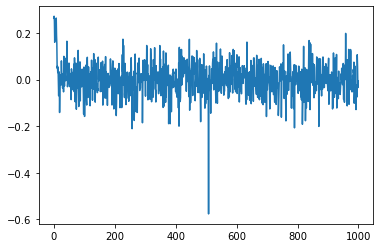

In [52]:
output = md(input).detach().numpy()
plt.plot(output)
plt.show()

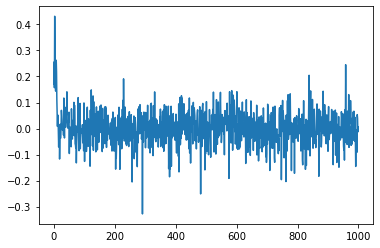

In [53]:
output = md_promax(input).detach().numpy()
plt.plot(output)
plt.show()